# **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
# **Módulo 7. Técnicas avanzadas para ciencia de datos y empleabilidad**
## **Semana 26. Ensambles**

¡Hola! Espero que te encuentres superbien.

En esta semana revisaremos los últimos tópicos que te permitirán salir al mundo real y al mercado laboral para que puedas aplicar todos los conocimientos que has adquirido a lo largo de esta travesía por la ciencia de datos y la inteligencia artificial.

Revisa el contenido con especial atención, haz tu copia y comienza a practicar. De esta manera surgirán dudas que podrás resolver con tu *coach* el día de tu clase.

# Ensambling

Hasta este punto te habrás dado cuenta que elegir un modelo para ponerlo «en producción» puede implicar bastantes formas de hacerlo, es decir, que para cada uno de los modelos que hemos hecho, las variables (alphas, betas, entre otras) puede ser bastantes, sino es que en algunos casos infinitas.

A veces, seleccionar solo un modelo o unos valores fijos establecidos no es la forma más óptima de trabajar, de hecho seleccionar un solo modelo para predecir con muy alta precisión es complicado. Por ello, nos basaremos en otra herramienta del aprendizaje automático: los **ensambles** (_ensemble_, en inglés), que buscarán principalmente disminuir la varianza, subir la precisión y evitar los sesgos.

Antes de entender esto con métodos técnicos, vamos a analizar una analogía:

Imagina que quieres comprar un coche, aunque no tienes claro si quieres comprar uno usado, que es muy barato, un seminuevo, que tiene un costo más alto, o uno nuevo, la opción más costosa. Algo que te empuja a decidir sobre el usado o el seminuevo es que el usado cuenta con características que el nuevo no tiene. Ante tantas decisiones, prefieres preguntar a un amigo cercano, a un mecánico de confianza y consultarlo en internet.

Pues bien, con base en lo que te indiquen estas tres fuentes, tomarás la decisión que más te convenga.


## Métodos de ensamble

En esta ocasión, veremos los dos métodos de ensamble más conocidos y que mejores resultados han dado. Por lo general, a estos modelos se les conoce como **metaestimadores**.

### Bagging

Viene de la palabra _**b**ootstrap **agg**regation_. Este método requiere que haya varios algoritmos corriendo en paralelo: cada uno seleccionará el modelo que mejor desempeño tenga y, al final, al juntar los distintos modelos que se han armado, se seleccionará aquel con «más votos» o el que seleccione algún algoritmo de ciencia de datos.

Vamos a comparar este método con el ejemplo del coche que quieres comprar.

Como mencionamos, quieres adquirir un vehículo, tienes tres opciones distintas y quieres consultarlo de tres formas diferentes. En cada una de las consultas le preguntas al entrevistado (el amigo, el mecánico e internet) por cuál de los tres coches vota (el usado, el seminuevo o el nuevo). El amigo te dijo que compres el seminuevo bajo los argumentos que él considera importantes; el mecánico indica que ve más factible la compra del seminuevo, e internet te indica que es mejor el nuevo. El siguiente paso es contar los votos: dos para el seminuevo, uno para el nuevo y ninguno para el usado. Tu decisión final es comprar el vehículo seminuevo.

Ahora, este mismo pensamiento vamos a plasmarlo en nuestro lenguaje de la ciencia de datos:

Primero, tenemos nuestro conjunto de entrenamiento. Lo que se hace con este método es dividirlo entre la cantidad de algoritmos de _machine learning_ que queremos evaluar, esto es, si queremos evaluar tres modelos, se tendrán que dividir el conjunto de entrenamiento en tres partes; pero el hecho de que un dato sea usado en el primer modelo no quiere decir que no pueda usarse en el segundo o el tercero, en otras palabras, aunque se armen distintos conjuntos de entrenamiento, los valores se pueden duplicar en otros conjuntos.

Es importante considerar que la división del conjunto de entrenamiento con distintos valores permitirá no solo que apliquemos modelos distintos, sino que puede usarse el mismo modelo y dará un resultado diferente, ya que hay una variación en el conjunto que está entrenando ese modelo.

Luego, cada modelo tendrá un resultado, el cual, a su vez, se evaluará con los distintos métodos para considerar el más correcto; finalmente, se seleccionará aquel que tenga el mejor desempeño.

![Bagging](https://drive.google.com/uc?export=view&id=1QhUqtAy8dnMUTY64deXRxis8GoJIHd96)


Para aplicar cualquiera de los métodos, primero debemos llevar a cabo los pasos del preprocesado, esto incluye dividir los métodos de entrenamiento y de _testing_. Por esta razón, usaremos las paqueterías que ya conocemos.

In [1]:
#Librerías que solemos usar para la manipulación de información y para graficar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

De igual manera, y como se indicó previamente, usaremos las funciones `train_test_split`, y para medir la precisión del modelo usaremos `accuracy_score`, ambos de **sklearn**.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Ahora te daremos un _tip_ que podría funcionar para que practiques distintos modelos de ciencia de datos.

**Seaborn** es una paquetería que permite hacer gráficos y diagramas usando como base **Pyplot**, solo que su enfoque se hace sobre _datasets_ de **Pandas**. No obstante, **Seaborn** proporciona algunos _datasets_ para probar las distintas gráficas o bien para analizarlas.

Para conocer los _datasets_ disponibles en tu código, escribe lo siguiente:
```python
sns.get_dataset_names()
```
(Obviamente, después de importar **Seaborn** y darle el alias `sns`). Mira el ejemplo siguiente y observa los resultados:

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

La única forma de conocer los datos es explorando los _datasets_ por tu cuenta.

Una vez seleccionados los datos, deberemos indicarlos de la siguiente forma:
```python
sns.load_dataset('<nombre_del_dataset>')
```
En el código que sigue hemos creado un objeto (un _dataframe_ de **Pandas**) llamado `df`, hemos borrado valores `NA` que existan en cualquier fila con `.dropna()` y hemos observado los primeros cinco valores con `.head(5)`.

In [4]:
df = sns.load_dataset('penguins').dropna()
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Siempre que analices un conjunto de datos usa `.dtypes` (sin paréntesis) para saber si hablamos de flotantes, enteros o valores categóricos, estos últimos mostrados como `object`.

In [5]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [9]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

En este nivel ya debes saber que para entrenar valores categóricos es necesario que a estos se les asigne un número: el _dataset_ de `pinguins`, que estamos usando de ejemplo, tiene la columna `sex`, que hace referencia al sexo del pingüino analizado, y tiene como posibles resultados `Male` o `Female`. Si convertimos estas etiquetas a números, a `Female` se le asignará `0` mientras que a `Male` se le asignará `1`.

Esto permitirá que podamos usar las herramientas de **Sklearn** en el conjunto de datos.

Para esto usaremos `LabelEncoder` y con el siguiente código automáticamente transformaremos todas las columnas que sean valores categóricos a números.


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder.fit_transform(list(df[col].values))
        df[col] = label_encoder.transform(df[col].values)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int32  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 16.9 KB


Observando el código de arriba, vemos que el bucle analiza una a una las columnas de `df` (`for col in df.columns:`); después de esto, si la columna analizada tiene con `.dtype` el valor `'object'`, entonces se aplicará `LabelEncoder`, el cual, como la mayoría de las funciones de **Sklearn**, requiere entrenarse con `fit_transform`.

Podemos ver los resultados con `.head()` o `.tail()`.

In [12]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [13]:
df.shape

(333, 7)

In [14]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0
343,2,0,49.9,16.1,213.0,5400.0,1


Podemos usar el mapa de calor de **Seaborn** para ver la relación entre las variables.

¿Recuerdas qué código se puede usar para tener este resultado solo con texto?

<Axes: >

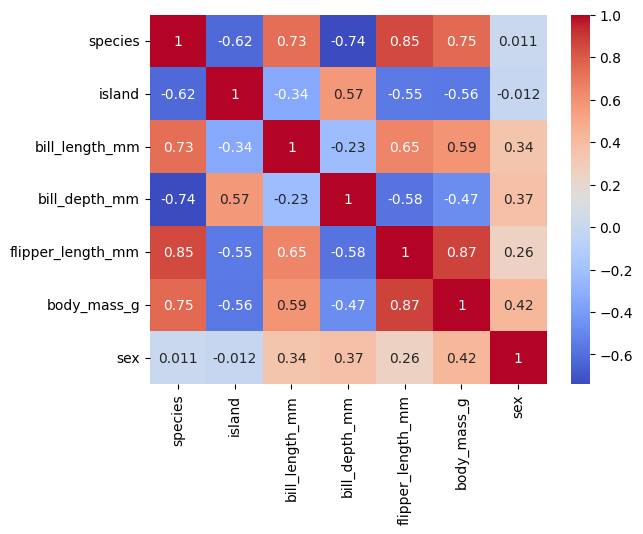

In [15]:
sns.heatmap(
    df.corr(), annot= True, cmap= 'coolwarm'
    )

Si a la pregunta anterior has contestado con `.corr()`, estás en lo correcto.

In [16]:
df.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435
bill_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078
bill_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000


Se puede sugerir ver el resultado de las demás variables en la variable objetivo (en nuestro ejemplo, `species`, ya que se trata de un problema de clasificación).

Podemos potencializar ese análisis usando `.sort_values(ascendign= False)`, para mostrar la correlación de mayor a menor.

> **NOTA**: No olvides qué valores cercanos a `1` están fuertemente correlacionados: si es `+1`, es una fuerte correlación positiva, mientras que `-1` es una fuerte correlación inversa. Por tanto, la forma en la que se muestra la información no quiere decir que el valor al fondo de la lista sea el que menor correlación tiene, sino que podría ser mayor la correlación inversa.

In [17]:
df.corr()['species'].sort_values(ascending= False)

species              1.000000
flipper_length_mm    0.850737
body_mass_g          0.750434
bill_length_mm       0.730548
sex                  0.010964
island              -0.622428
bill_depth_mm       -0.740346
Name: species, dtype: float64

Ahora es más fácil determinar cuáles son las variables independientes ($X$) y cuál es el objetivo ($y$).

In [18]:
X = df[['flipper_length_mm',
        'sex',
        'body_mass_g',
        'bill_length_mm',
        'island',
        'bill_depth_mm']]

y = df['species']

In [19]:
X

,flipper_length_mm,sex,body_mass_g,bill_length_mm,island,bill_depth_mm
0,181.0,1,3750.0,39.1,2,18.7
1,186.0,0,3800.0,39.5,2,17.4
2,195.0,0,3250.0,40.3,2,18.0
4,193.0,0,3450.0,36.7,2,19.3
5,190.0,1,3650.0,39.3,2,20.6
...,...,...,...,...,...,...
338,214.0,0,4925.0,47.2,0,13.7
340,215.0,0,4850.0,46.8,0,14.3
341,222.0,1,5750.0,50.4,0,15.7
342,212.0,0,5200.0,45.2,0,14.8


In [20]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int32

In [21]:
y.value_counts()

species
0    146
2    119
1     68
Name: count, dtype: int64

Si en algún momento tienes duda, no olvides usar `.shape` para esta seguro que miden lo mismo y que `y` es un valor adimensional.

> **NOTA**: No es lo mismo `(100, 1)` que `(100,)`.

In [22]:
X.shape, y.shape

((333, 6), (333,))

Listo, ahora partamos en conjuntos de entrenamiento y de prueba:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

Este ejemplo es de clasificación, por lo que usaremos `BaggingClassifier`; para regresión, debe usarse `BaggingRegressor`.

La ventaja del modelo **bagging** es que podemos usar cualquier modelo de clasificación para utilizarlo. Como se comentó, el modelo que importaremos dividirá de manera automática el conjunto de entrenamiento en subconjuntos, a los cuales entrenará de forma independiente para finalmente «votar» por aquel que dé mejor resultado.

Vamos a usar `KNeighborsClassifier` para este primer ejemplo. Lo que haremos es utilizar **KNN** como lo usaríamos si fuera entrenado como ya sabemos. Para el segundo ejemplo usaremos **bagging**.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

El siguiente código es muy sencillo, ya que es el modelo entrenado que predice los valores para finalmente indicarnos su _accuracy_.

In [25]:
model1 = KNeighborsClassifier().fit(X_train, y_train)

model1_predict = model1.predict(X_test)

print('El Accuracy usando KNN es de: {}'.format(accuracy_score(model1_predict, y_test)))

El Accuracy usando KNN es de: 0.8208955223880597


Haremos lo mismo, pero esta vez aplicando **bagging**.

In [ ]:
# !pip install --upgrade scikit-learn

In [26]:
model2 = BaggingClassifier(estimator=KNeighborsClassifier(),
                           n_estimators= 500,
                           random_state= 42).fit(X_train, y_train)

Como verás, este objeto requiere que indiquemos algunos valores:

- `base_estimator`: aquí señalaremos el modelo base que usaremos, el cual será **KNN**; es importante colocar el objeto: como este es importado de **Sklearn**, por lo tanto, no entrenado, deberá tener los paréntesis, y si es necesario indicar adentro algunos argumentos, estos deben ser mencionados.
- `n_estimators`: debemos señalar cuántos subconjuntos hará el _bagging_. Recuerda: dentro de estos pequeños conjuntos, los valores se pueden repetir. Esto no quiere decir que porque tienes 200 elementos y digas que quieres 50 estimadores, cada uno será de cuatro; _bagging_ seleccionará cuántos elementos son los más óptimos.
- `random_state`: esta es la semilla y solo sirve para que cada vez que corramos el código siempre dé los mismos resultados, ignorando su naturaleza aleatoria.

Como en el código anterior, haremos una predicción y veremos su _accuracy_.

In [27]:
model2_predict = model2.predict(X_test)
print('El Accuracy usando Bagging con KNN es de: {}'.format(accuracy_score(model2_predict, y_test)))

El Accuracy usando Bagging con KNN es de: 0.8208955223880597


Apenas el modelo mejoró un poco más. El siguiente código hará lo mismo, pero usando `DecisionTreeClasifier`:

In [28]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier().fit(X_train, y_train)
model3_predict = model3.predict(X_test)
print('El Accuracy usando Decition Tree es de: {}'.format(accuracy_score(model3_predict, y_test)))

model4 = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators= 100,
                           random_state= 19).fit(X_train, y_train)
model4_predict = model4.predict(X_test)
print('El Accuracy usando Bagging con Decition Tree es de: {}'.format(accuracy_score(model4_predict, y_test)))

El Accuracy usando Decition Tree es de: 0.9850746268656716
El Accuracy usando Bagging con Decition Tree es de: 1.0


Observa cómo el resultado en el _**bagging**_ con _**decision tree**_ da como resultado `1.0`. Es evidente que es un problema de _overfitting_. Ten cuidado con este tipo de resultados.

#### **Ponte a prueba 1**

**Contexto**:

Los vinos provienen de diferentes regiones, variedades de uva y procesos de fermentación. A lo largo de los años, los sommeliers y entusiastas del vino han desarrollado un paladar agudo para juzgar la calidad de un vino. En el mundo de la ciencia de datos, ¿podemos predecir la calidad de un vino basándonos en sus características químicas?

Te proporcionamos un conjunto de datos que contiene muestras de variantes tinto y blanco del vino portugués "Vinho Verde". Debido a cuestiones de privacidad y logística, solo se incluyen variables fisicoquímicas (entradas) y sensoriales (la salida) relacionadas con la calidad del vino.

**Dataset**:

El conjunto de datos contiene las siguientes características:

1. **Acidez fija**
2. **Volatile acidity**
3. **Ácido cítrico**
4. **Residual sugar**
5. **Cloruros**
6. **Free sulfur dioxide**
7. **Total sulfur dioxide**
8. **Densidad**
9. **pH**
10. **Sulphates**
11. **Alcohol**
12. **Quality** (puntuación entre 0 y 10)

Puedes encontrar el conjunto de datos en el siguiente enlace: https://drive.google.com/file/d/12VrHD1Io9R4qeYFTxxVnnLcY5dbaghLz/view?usp=sharing

**Actividades**:

1. **Exploración de Datos**:
   - Carga el conjunto de datos y realiza un análisis exploratorio básico. Mira las distribuciones, valores faltantes y estadísticas descriptivas.
   
2. **Preprocesamiento**:
   - Gestiona cualquier valor faltante o atípico si es necesario.
   - Divide el conjunto de datos en conjuntos de entrenamiento y prueba.
   
3. **Modelado Base**:
   - Entrena un modelo de regresión logística (o cualquier otro modelo de tu elección) como tu modelo base.
   - Evalúa su precisión en el conjunto de prueba.

4. **Ensambling**:
   - Utiliza técnicas de ensambling, como Bagging o Boosting, para entrenar un ensamble de modelos.
   - Compara la precisión del ensamble con la del modelo base. ¿Ves alguna mejora?

In [32]:
data = pd.read_csv('wineQT.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [34]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


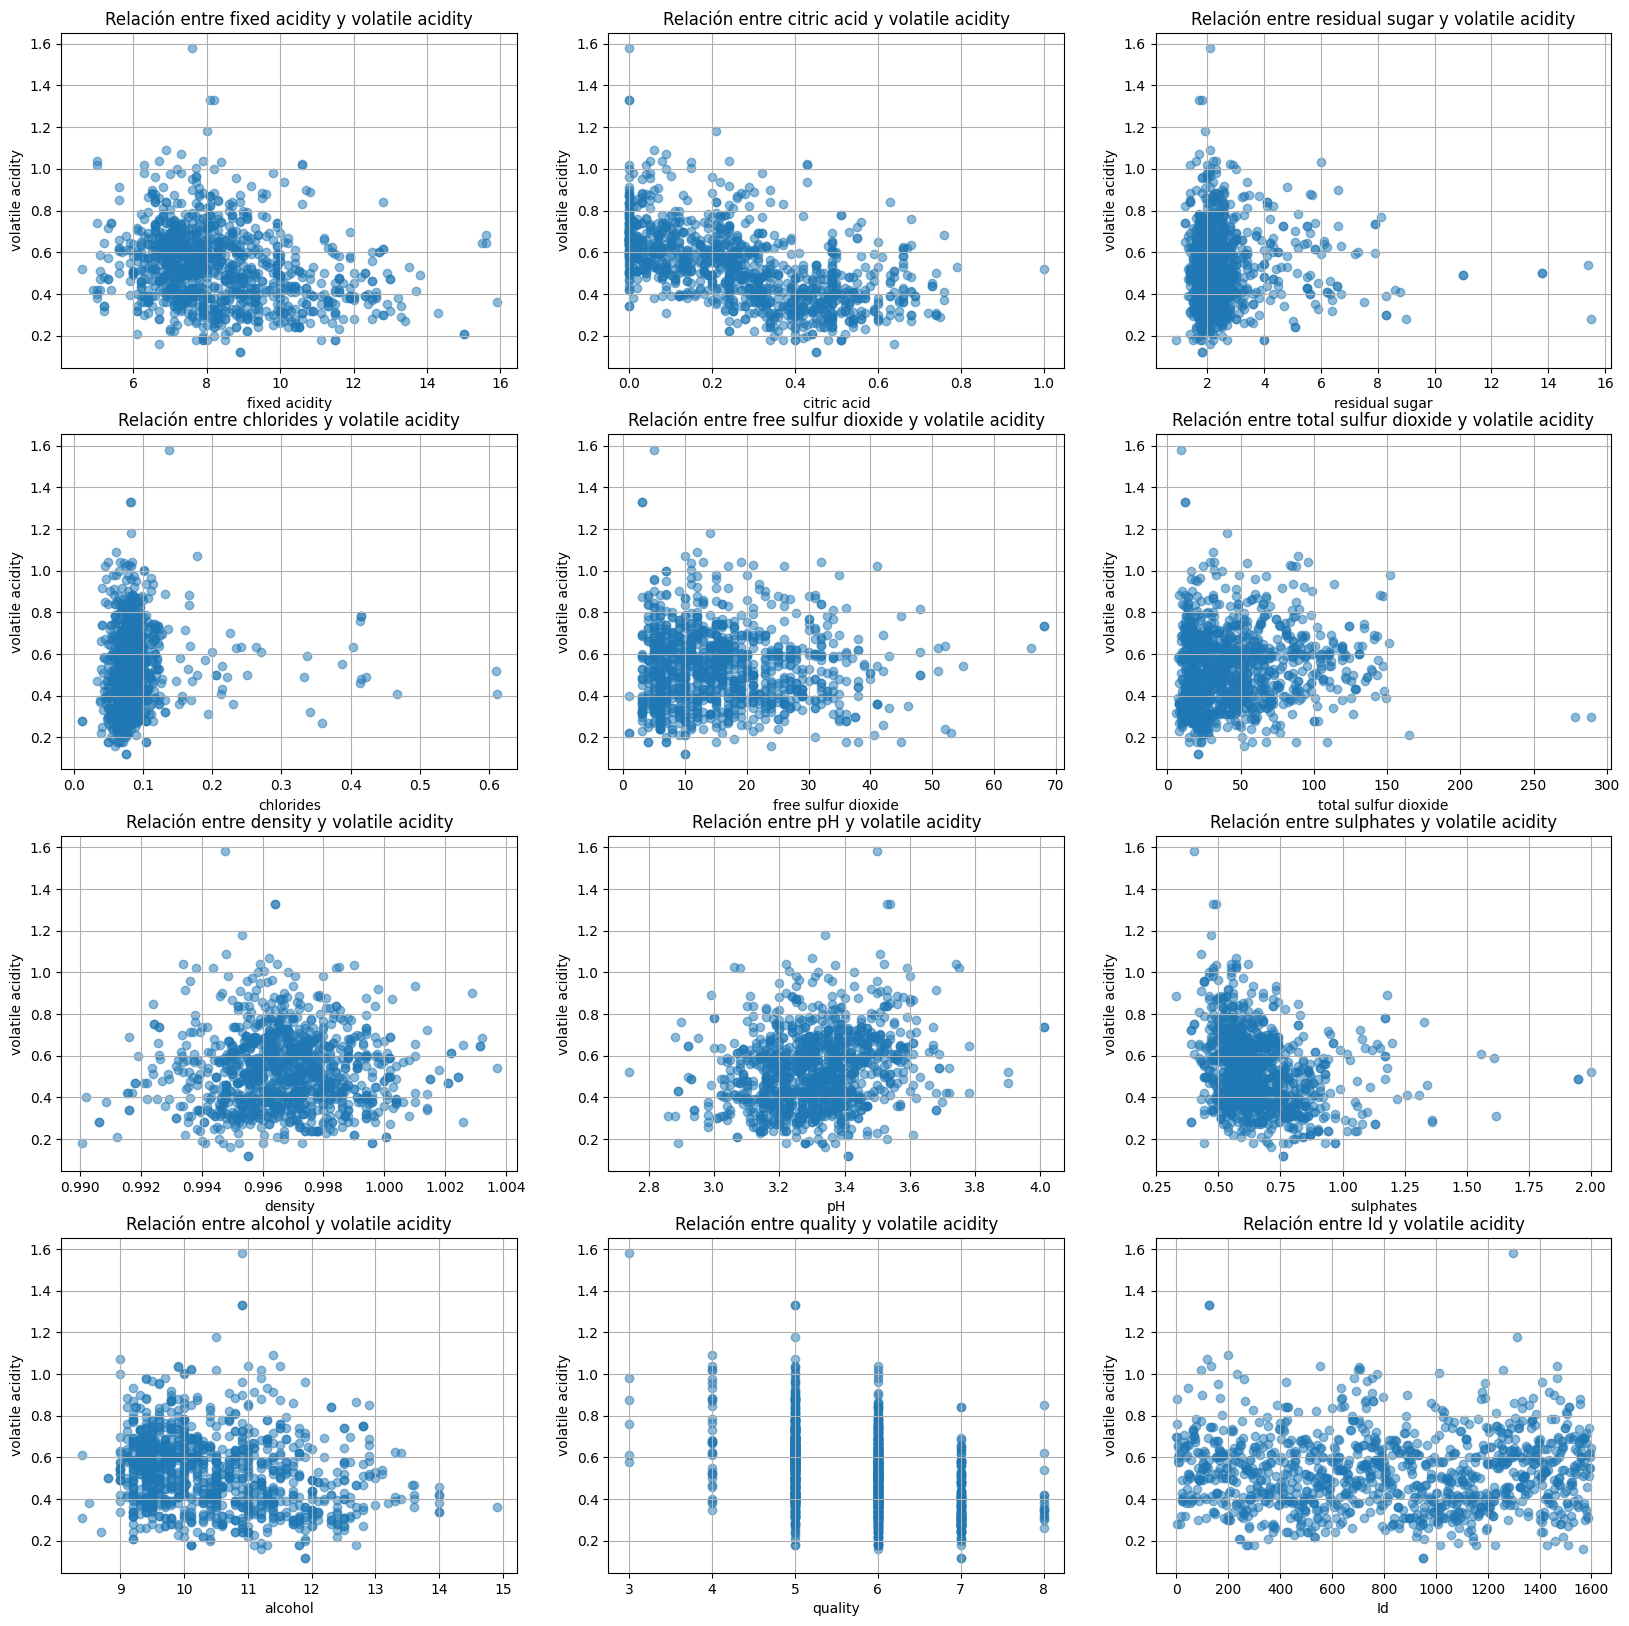

In [36]:
import matplotlib.pyplot as plt

# Detectar automáticamente las columnas del dataset que no son la variable dependiente
dependent_var = 'volatile acidity'  # Cambiar dependiendo del dataset
independent_vars = [col for col in data.columns if col != dependent_var]

# Configuración del diseño de subgráficos
num_vars = len(independent_vars)
cols = 3  # Número de columnas en el diseño ajustadas automaticamente
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar los gráficos
for i, var in enumerate(independent_vars):
    ax = axes[i]
    ax.scatter(data[var], data[dependent_var], alpha=0.5)
    ax.set_title(f'Relación entre {var} y {dependent_var}')
    ax.set_xlabel(var)
    ax.set_ylabel(dependent_var)
    ax.grid()

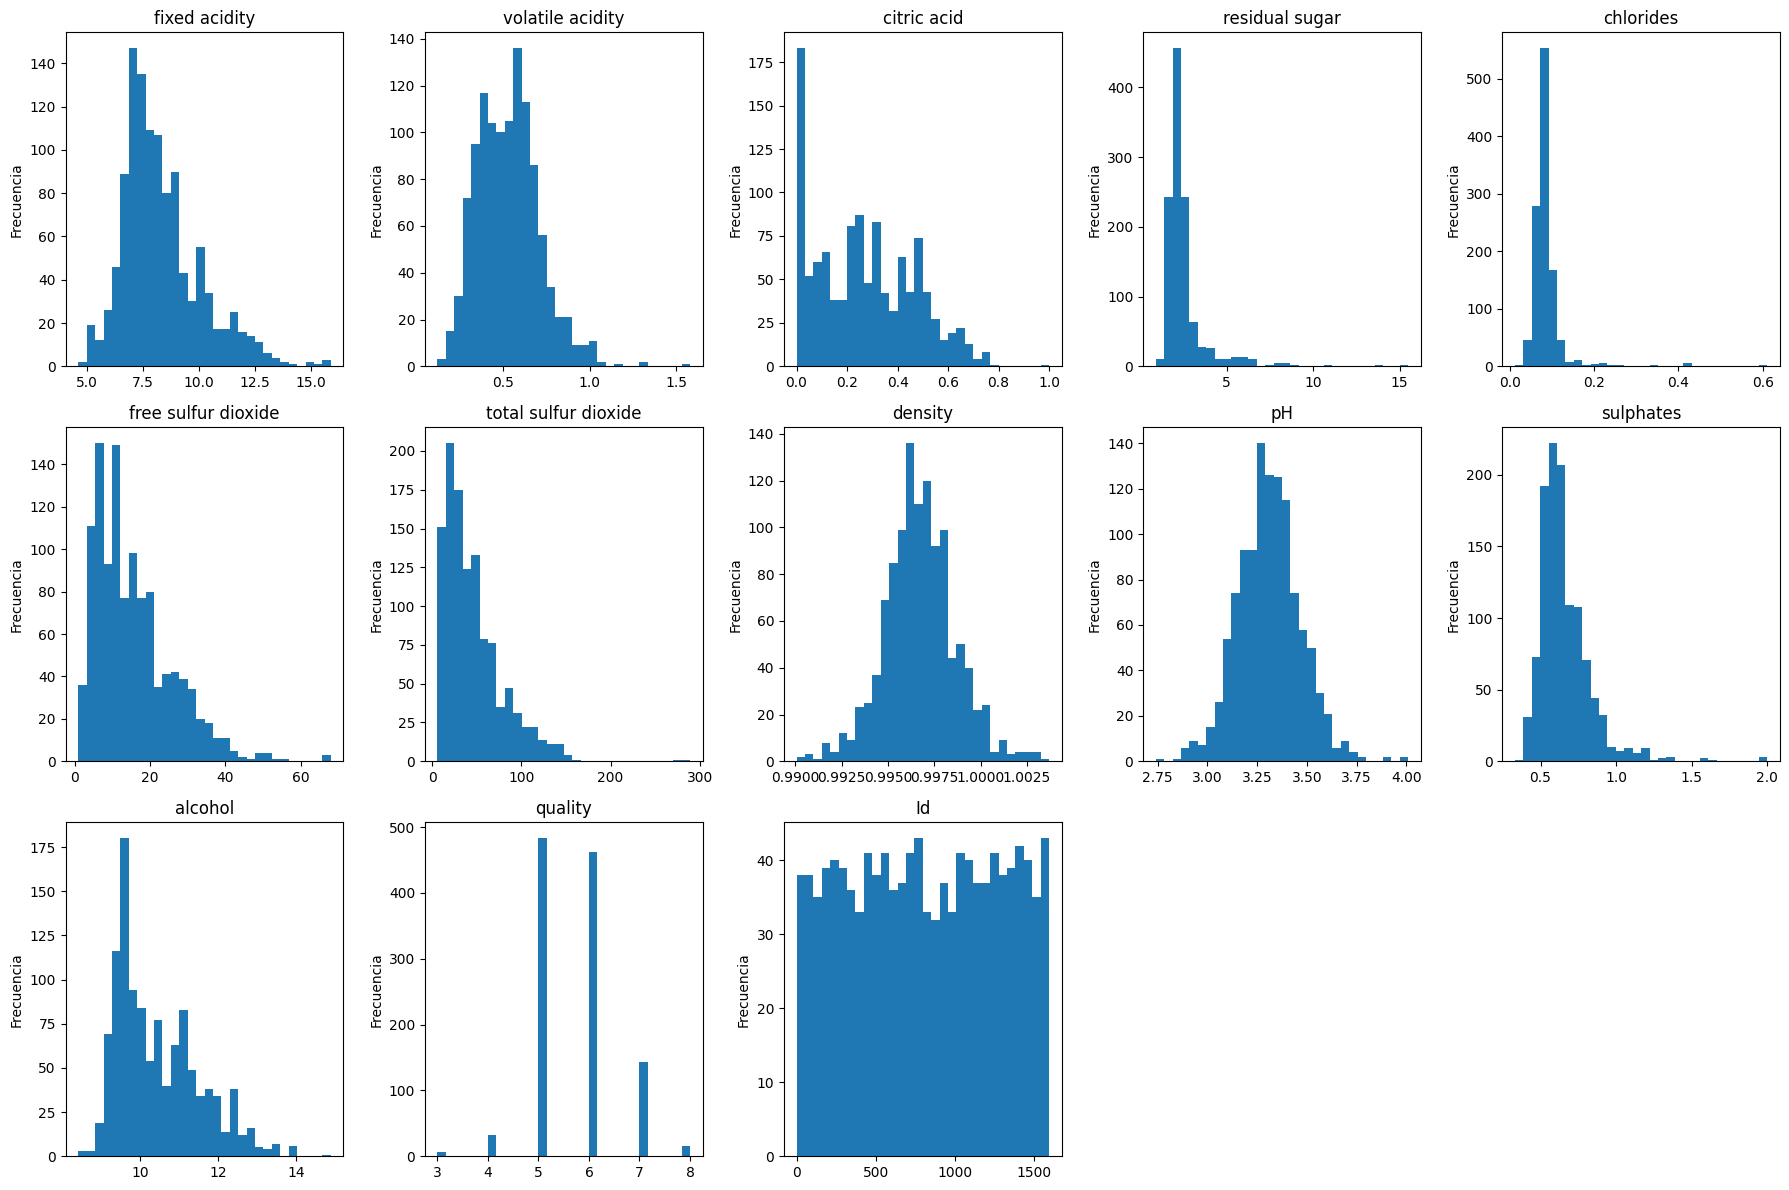

In [37]:
import matplotlib.pyplot as plt
import math

# Número de columnas en la grilla
n_cols = 5
n_vars = data.shape[1]
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes sobrantes si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [38]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [44]:
# Crear variable binaria a partir de quality
data['quality'] = (data['quality'] >= 6).astype(int)

# Ver la nueva distribución
print(data['quality'].value_counts())


quality
1    621
0    522
Name: count, dtype: int64


In [45]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables independientes (X) y dependiente (y)
X = data.drop('quality', axis=1)  # Variables independientes
y = data['quality']  # Variable dependiente

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Modelo base
nb = GaussianNB()

# Bagging con Naive Bayes
bagging_nb = BaggingClassifier(
    estimator=nb,
    n_estimators=200,
)

# Entrenamiento
bagging_nb.fit(X_train, y_train)

# Predicciones
y_pred = bagging_nb.predict(X_test)

# Métrica rápida
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Modelo Naive Bayes simple (sin bagging)
nb_simple = GaussianNB()

# Entrenamiento
nb_simple.fit(X_train, y_train)

# Predicciones
y_pred_nb = nb_simple.predict(X_test)

# Métrica
print("Accuracy Naive Bayes:", accuracy_score(y_test, y_pred_nb))


Accuracy Naive Bayes: 1.0


### **Boosting**

El método de _**boosting**_ es una técnica de ensamble en aprendizaje automático en la cual varios modelos débiles son entrenados para combinarse y producir un modelo más fuerte. Los modelos débiles son generalmente algoritmos simples, como árboles de decisiones, mientras que el modelo final es una combinación ponderada de estos modelos débiles. La idea detrás del _boosting_ es que cada modelo débil corrige los errores cometidos por los modelos anteriores en el ensamble, lo que finalmente conduce a un modelo más preciso.

Veámoslo con el ejemplo del coche que queremos comprar. El escenario es el mismo: quieres adquirir un vehículo pero no sabes cuál, por ello te asesorarás con un mecánico, un amigo y en internet.

A diferencia del _bagging_, en el que preguntábamos en paralelo y cuestionábamos a cada consultor de forma independiente, este método exige que se haga en serie, o sea, uno tras otro. Primero consultamos en internet y tomamos nota de cuál es su consejo de compra, luego compartimos ese resultado con nuestro amigo, quien nos da su retroalimentación, la cual volvemos a anotar, y finalmente compartimos esas notas con el mecánico para tomar una decisión final.

Como has visto en el ejemplo anterior, son varios modelos, uno tras otro, los cuales van mejorando los resultados.

![Boosting](https://drive.google.com/uc?export=view&id=194suXUZgz1SxvHiZnyqg2HIKsZm4FBxc)

Para ejecutar este método, básicamente se siguen los mismo pasos que el _bagging_, solo que usaremos paquetes distintos.

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

También existe una versión para modelos de regresión, llamada `ensemble.GradientBoostingRegressor`, aunque vale la pena indicar algunos aspectos. Este algoritmo funciona construyendo una secuencia de árboles de decisiones débiles, por lo que no utiliza otro tipo de algoritmo. Es opcional indicar el **gradiente de la función de pérdida** y de esta forma se podrá gestionar una mejora entre modelo y modelo.





In [50]:
model5 = GradientBoostingClassifier(n_estimators=50, random_state= 19).fit(X_train, y_train)

En nuestro ejemplo indicaremos 50 estimadores, es decir, los modelos conectados en serie. Si gustas, puedes indicar parámetros como profundidad de los árboles o la tasa de aprendizaje. En nuestro ejemplo los omitiremos.

La predicción se hace como cualquier algoritmo de la paquetería de **Sklearn**.

In [51]:
model5_predict = model5.predict(X_test)
print('El Accuracy usando Boosting es de: {}'.format(accuracy_score(model5_predict, y_test)))

El Accuracy usando Boosting es de: 1.0


In [52]:
X_train.shape

(914, 13)

Nota que el resultado es `1.0`, lo que no es bueno ver, pero esto se debe a que el modelo revisado es muy pequeño, por lo que la aplicación del algoritmo está generando un sobreajuste.

Vamos a generar un _dataset_ ficticio que nos ayudará a practicar. Para eso usaremos el siguiente código:

In [53]:
from pandas.core.arrays.sparse import array
from sklearn.datasets import make_classification
array_sample = make_classification(n_samples= 2000,
                                   n_features= 7,
                                   n_classes= 4,
                                   n_informative=3,
                                   random_state= 19)
df_sample = pd.DataFrame(array_sample[0],
                         columns=[
                             'Feature 1',
                             'Feature 2',
                             'Feature 3',
                             'Feayure 4',
                             'Feature 5',
                             'Feature 6',
                             'Feature 7',
                             ])
df_sample['Label'] = array_sample[1]

In [54]:
df_sample.head()

,Feature 1,Feature 2,Feature 3,Feayure 4,Feature 5,Feature 6,Feature 7,Label
0,1.248399,0.288446,0.989781,1.134189,0.471949,-0.606530,0.751970,1
1,2.461419,0.519658,-1.808511,-1.158262,1.473645,-1.772564,-0.261430,1
2,-0.682646,-0.554511,-0.525250,0.882634,0.868396,-0.874409,-0.198417,0
3,-0.798854,-1.136716,-0.918318,-2.751196,0.232908,-0.181391,-1.608111,1
4,-0.450719,-0.052984,-0.435610,-0.136504,-1.396533,1.529541,0.352649,2


In [56]:
df_sample['Label'].value_counts()

Label
0    506
3    501
2    500
1    493
Name: count, dtype: int64

In [57]:
df_sample.shape

(2000, 8)

In [58]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  2000 non-null   float64
 1   Feature 2  2000 non-null   float64
 2   Feature 3  2000 non-null   float64
 3   Feayure 4  2000 non-null   float64
 4   Feature 5  2000 non-null   float64
 5   Feature 6  2000 non-null   float64
 6   Feature 7  2000 non-null   float64
 7   Label      2000 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 117.3 KB


In [60]:
from sklearn.model_selection import train_test_split

# Variables independientes y dependiente
X = df_sample.drop('Label', axis=1)
y = df_sample['Label']

# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

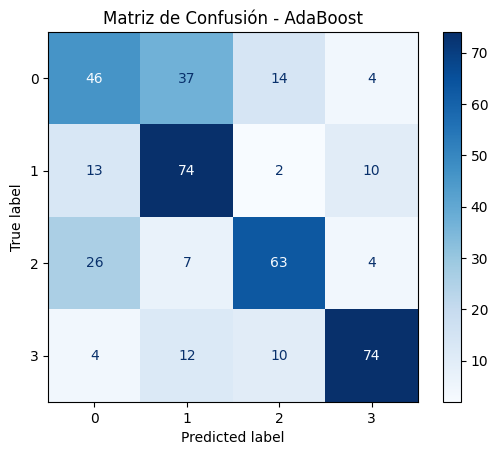

Classification Report - AdaBoost
              precision    recall  f1-score   support

           0       0.52      0.46      0.48       101
           1       0.57      0.75      0.65        99
           2       0.71      0.63      0.67       100
           3       0.80      0.74      0.77       100

    accuracy                           0.64       400
   macro avg       0.65      0.64      0.64       400
weighted avg       0.65      0.64      0.64       400



In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

ada = AdaBoostClassifier(n_estimators=200, random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ada)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de Confusión - AdaBoost")
plt.show()

print("Classification Report - AdaBoost")
print(classification_report(y_test, y_pred_ada))


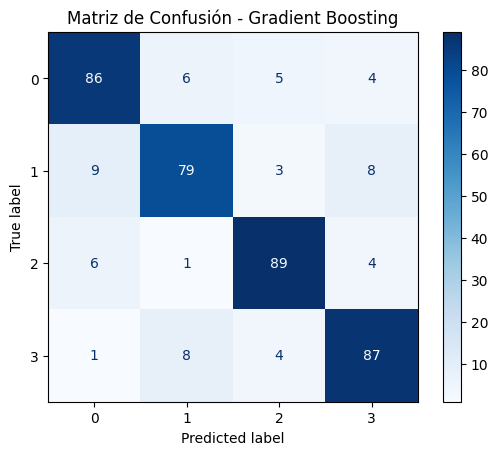

Classification Report - Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       101
           1       0.84      0.80      0.82        99
           2       0.88      0.89      0.89       100
           3       0.84      0.87      0.86       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de Confusión - Gradient Boosting")
plt.show()

print("Classification Report - Gradient Boosting")
print(classification_report(y_test, y_pred_gb))


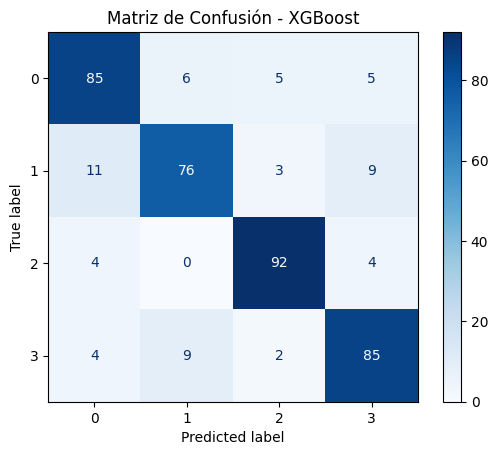

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       101
           1       0.84      0.77      0.80        99
           2       0.90      0.92      0.91       100
           3       0.83      0.85      0.84       100

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [63]:
# pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))


#### **Ponte a prueba 2**

**Contexto**:

El rendimiento académico es un tema de interés en el mundo educativo. Existen muchos factores que pueden influir en el rendimiento de un estudiante: horas de estudio, asistencia a clases, participación en actividades extracurriculares, entre otros. ¿Podemos predecir el rendimiento de un estudiante basándonos en ciertas características?

Para este ejercicio, te proporcionamos un conjunto de datos que contiene características de estudiantes y su rendimiento académico, medido como su promedio general.

**Dataset**:

El conjunto de datos contiene las siguientes características:

1. **Horas de estudio por semana**
2. **Asistencia (%)**
3. **Participación en actividades extracurriculares (0/1)**
4. **Horas de sueño por noche**
5. **Número de materias**
6. **Uso de recursos en línea (0/1)**
7. **Participación en grupos de estudio (0/1)**
8. **Promedio general (puntuación entre 0 y 100)**

Puedes encontrar el conjunto de datos en el siguiente enlace: https://drive.google.com/file/d/1R-nsee0LkWYs4L15j9Rk1p745KNDlDIL/view?usp=sharing

**Actividades**:

1. **Exploración de Datos**:
   - Carga el conjunto de datos y realiza un análisis exploratorio básico. Observa las distribuciones, verifica si hay valores faltantes y examina las estadísticas descriptivas.
   
2. **Preprocesamiento**:
   - Maneja cualquier valor faltante o atípico si es necesario.
   - Divide el conjunto de datos en conjuntos de entrenamiento y prueba.
   
3. **Modelado Base**:
   - Entrena un modelo (puede ser una regresión logística, árbol de decisión, etc.) como tu modelo base.
   - Evalúa su precisión en el conjunto de prueba.

4. **Ensambling con Bagging**:
   - Utiliza la técnica de Bagging para entrenar un ensamble de modelos.
   - Experimenta con diferentes números de estimadores y observa su impacto en el rendimiento del modelo.
   - Compara la precisión del ensamble con la del modelo base.

In [64]:
student = pd.read_csv('student_performance_dataset.csv')

student.head()

,study_hours,attendance,extracurriculars,sleep_hours,num_subjects,online_resources,study_groups,average_score
0,17.483571,66.699303,1,7.284559,8,0,0,89
1,14.308678,64.182714,1,6.007027,6,0,0,83
2,18.238443,85.457210,0,7.638831,6,0,0,100
3,22.615149,88.259029,1,7.028722,6,0,1,100
4,13.829233,61.263446,1,6.037770,8,0,1,85


In [65]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   study_hours       1000 non-null   float64
 1   attendance        1000 non-null   float64
 2   extracurriculars  1000 non-null   int64  
 3   sleep_hours       1000 non-null   float64
 4   num_subjects      1000 non-null   int64  
 5   online_resources  1000 non-null   int64  
 6   study_groups      1000 non-null   int64  
 7   average_score     1000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [66]:
student['online_resources'].value_counts()

online_resources
1    520
0    480
Name: count, dtype: int64

In [67]:
student.describe()

,study_hours,attendance,extracurriculars,sleep_hours,num_subjects,online_resources,study_groups,average_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,15.096660,80.145952,0.482000,6.993205,6.994000,0.52000,0.507000,95.494000
std,4.896080,11.534273,0.499926,1.480430,1.408527,0.49985,0.500201,6.896341
min,-1.206337,60.128731,0.000000,2.513296,5.000000,0.00000,0.000000,68.000000
25%,11.762048,69.887965,0.000000,6.013093,6.000000,0.00000,0.000000,92.000000
50%,15.126503,80.645041,0.000000,6.980555,7.000000,1.00000,1.000000,100.000000
75%,18.239719,89.852745,1.000000,7.982684,8.000000,1.00000,1.000000,100.000000
max,34.263657,99.976549,1.000000,12.889357,9.000000,1.00000,1.000000,100.000000


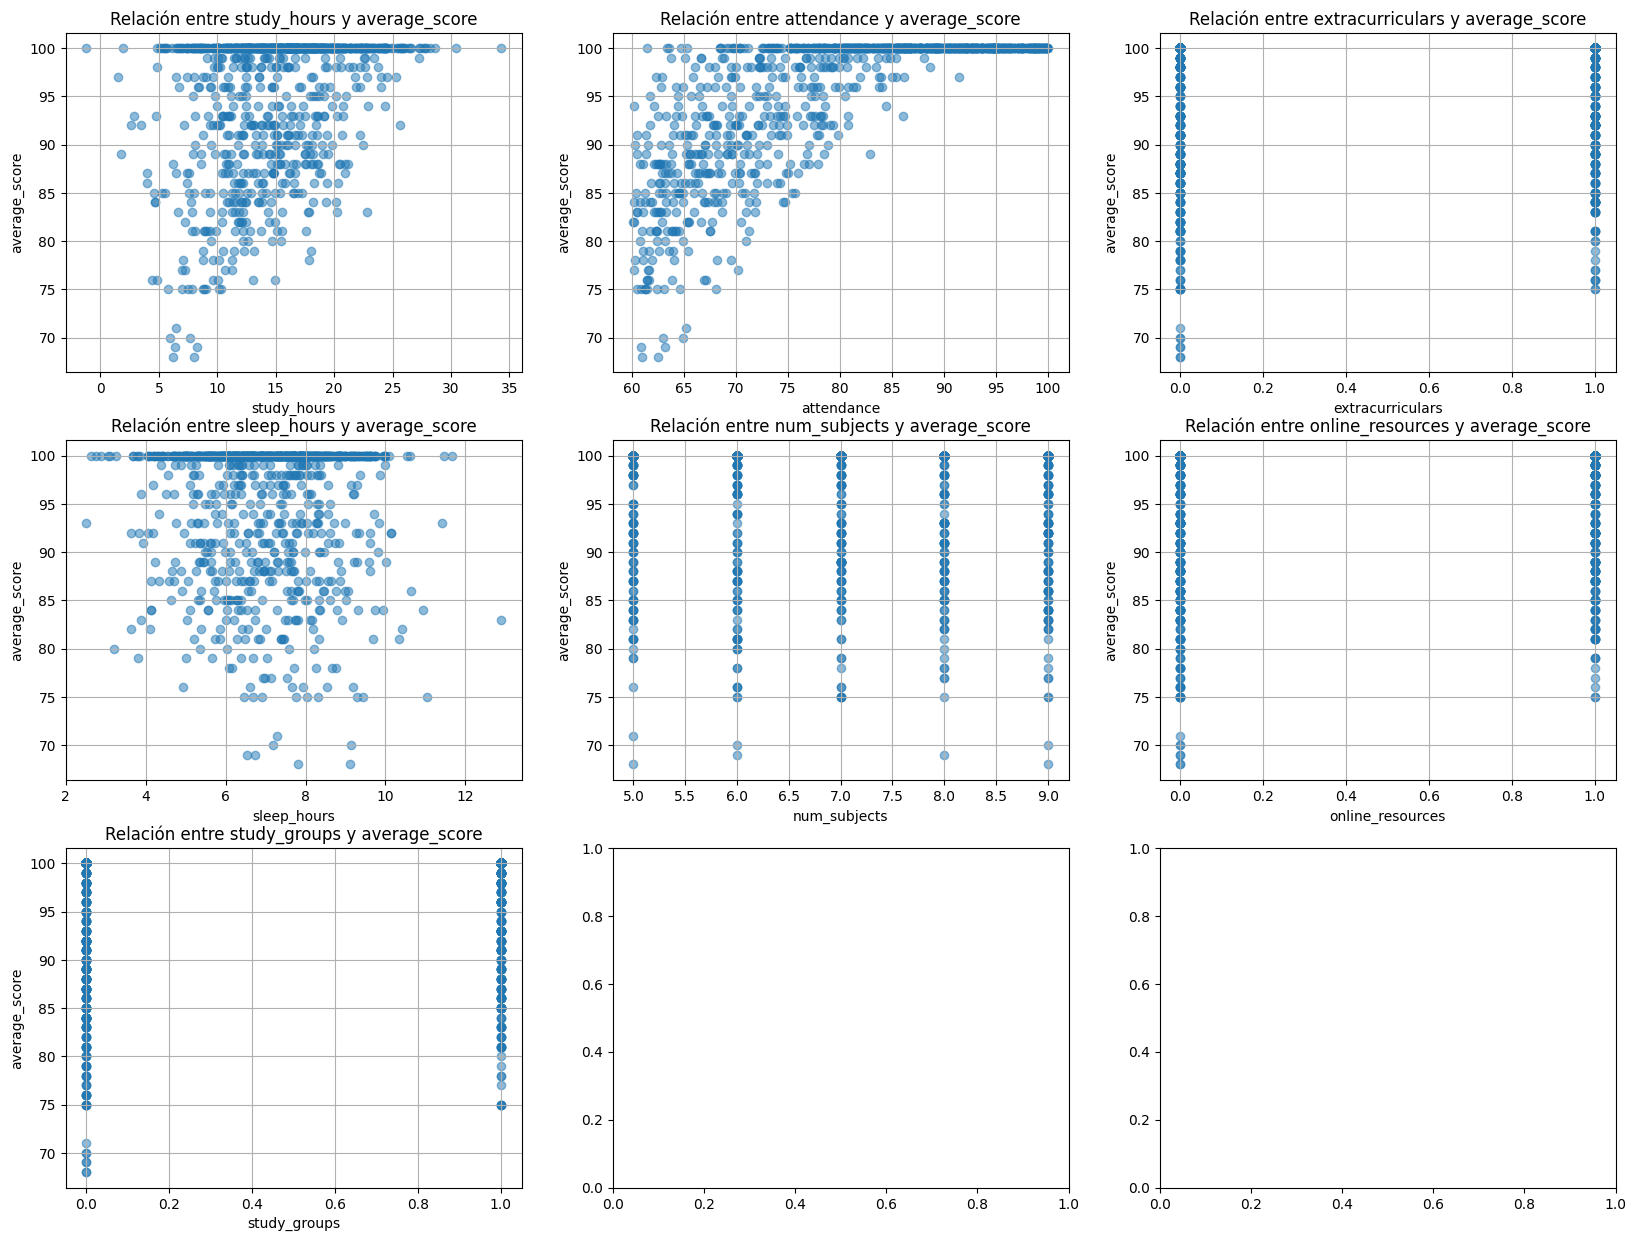

In [71]:
import matplotlib.pyplot as plt

# Detectar automáticamente las columnas del dataset que no son la variable dependiente
dependent_var = 'average_score'  # Cambiar dependiendo del dataset
independent_vars = [col for col in student.columns if col != dependent_var]

# Configuración del diseño de subgráficos
num_vars = len(independent_vars)
cols = 3  # Número de columnas en el diseño ajustadas automaticamente
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar los gráficos
for i, var in enumerate(independent_vars):
    ax = axes[i]
    ax.scatter(student[var], student[dependent_var], alpha=0.5)
    ax.set_title(f'Relación entre {var} y {dependent_var}')
    ax.set_xlabel(var)
    ax.set_ylabel(dependent_var)
    ax.grid()

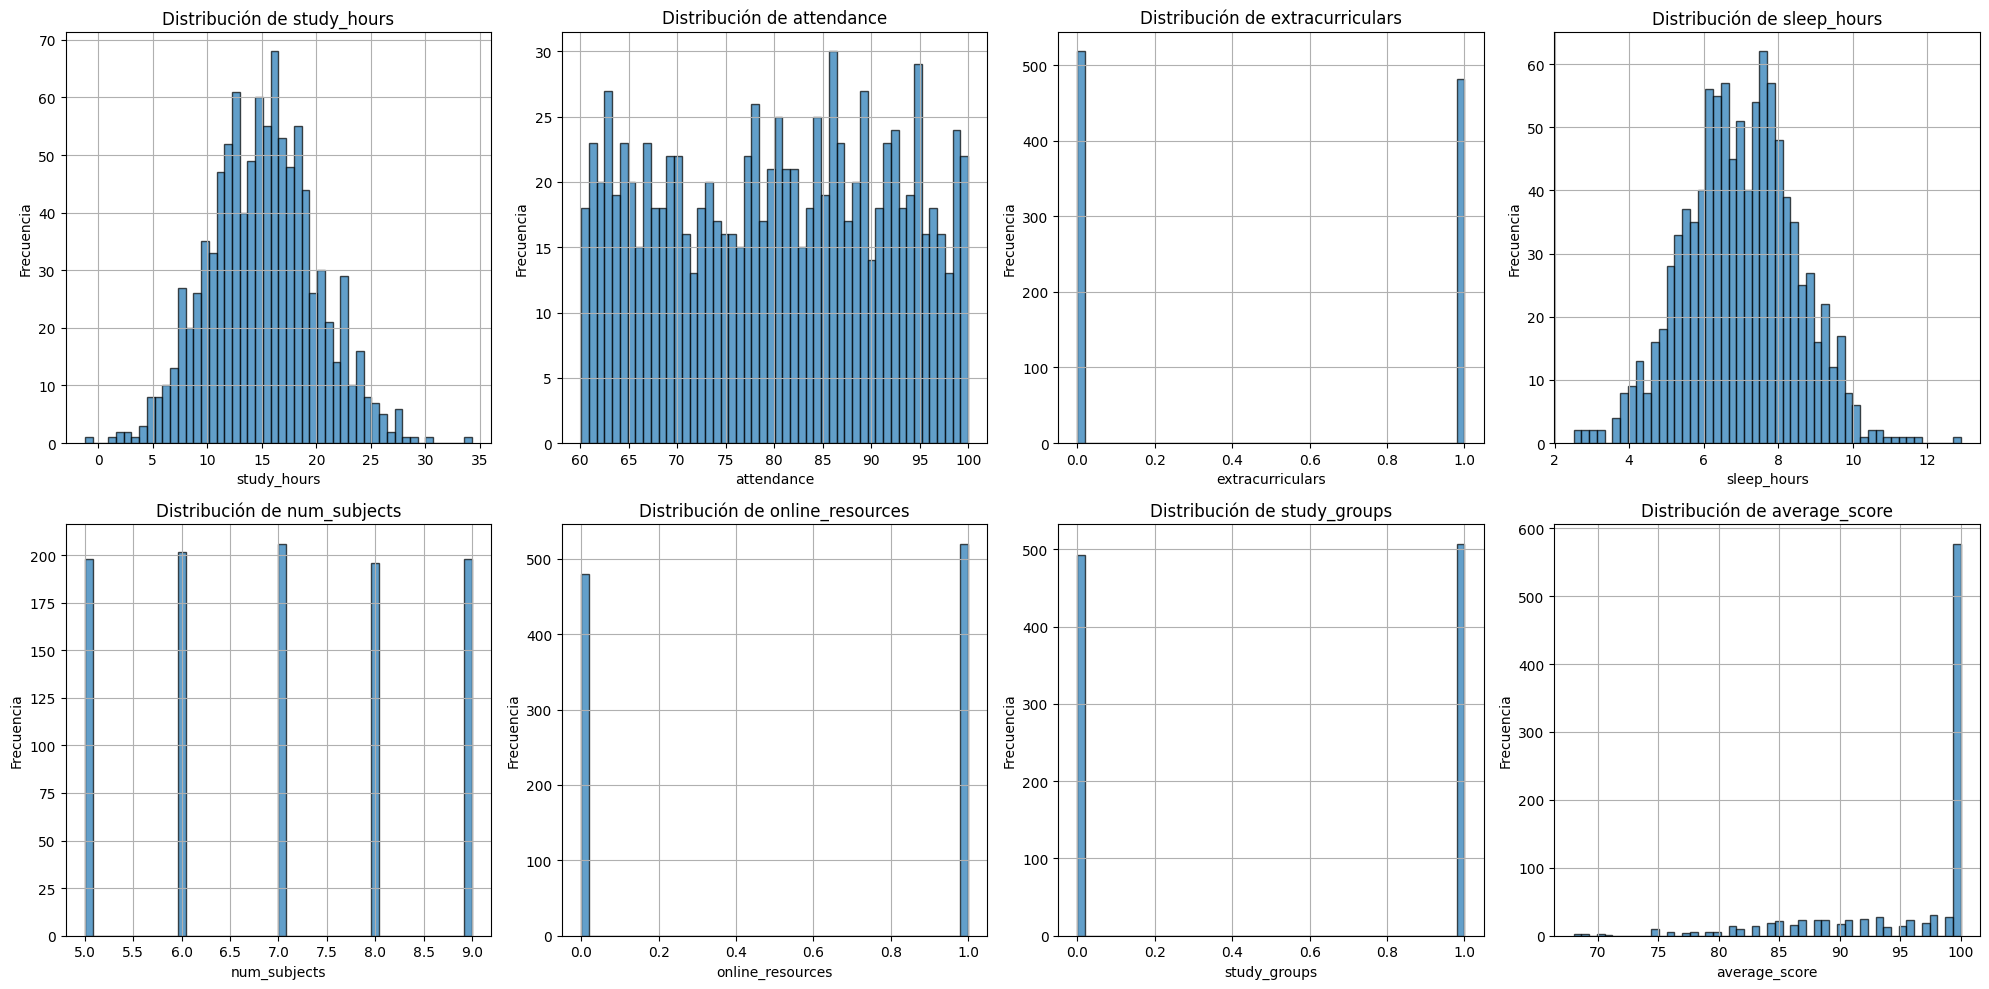

In [74]:
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = student.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(student[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [75]:
student.isnull().sum()

study_hours         0
attendance          0
extracurriculars    0
sleep_hours         0
num_subjects        0
online_resources    0
study_groups        0
average_score       0
dtype: int64

(array([  4.,  22.,  96., 228., 272., 226., 104.,  38.,   9.,   1.]),
 array([-1.2063367 ,  2.34066272,  5.88766213,  9.43466155, 12.98166096,
        16.52866038, 20.07565979, 23.62265921, 27.16965862, 30.71665804,
        34.26365745]),
 <BarContainer object of 10 artists>)

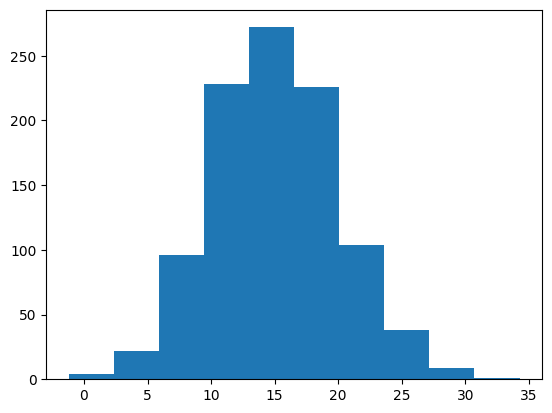

In [77]:
plt.hist(student['study_hours'])

In [78]:
cols = ['study_hours', 'attendance', 'sleep_hours']

for col in cols:
    Q1 = student[col].quantile(0.25)
    Q3 = student[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"{col}")
    print(f"  Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
    print(f"  Límites: [{lower:.2f}, {upper:.2f}]")

    # Eliminar outliers de esa columna
    student = student[(student[col] >= lower) & (student[col] <= upper)]


study_hours
  Q1=11.76, Q3=18.24, IQR=6.48
  Límites: [2.05, 27.96]
attendance
  Q1=69.88, Q3=89.73, IQR=19.86
  Límites: [40.09, 119.52]
sleep_hours
  Q1=6.01, Q3=8.00, IQR=1.99
  Límites: [3.03, 10.98]


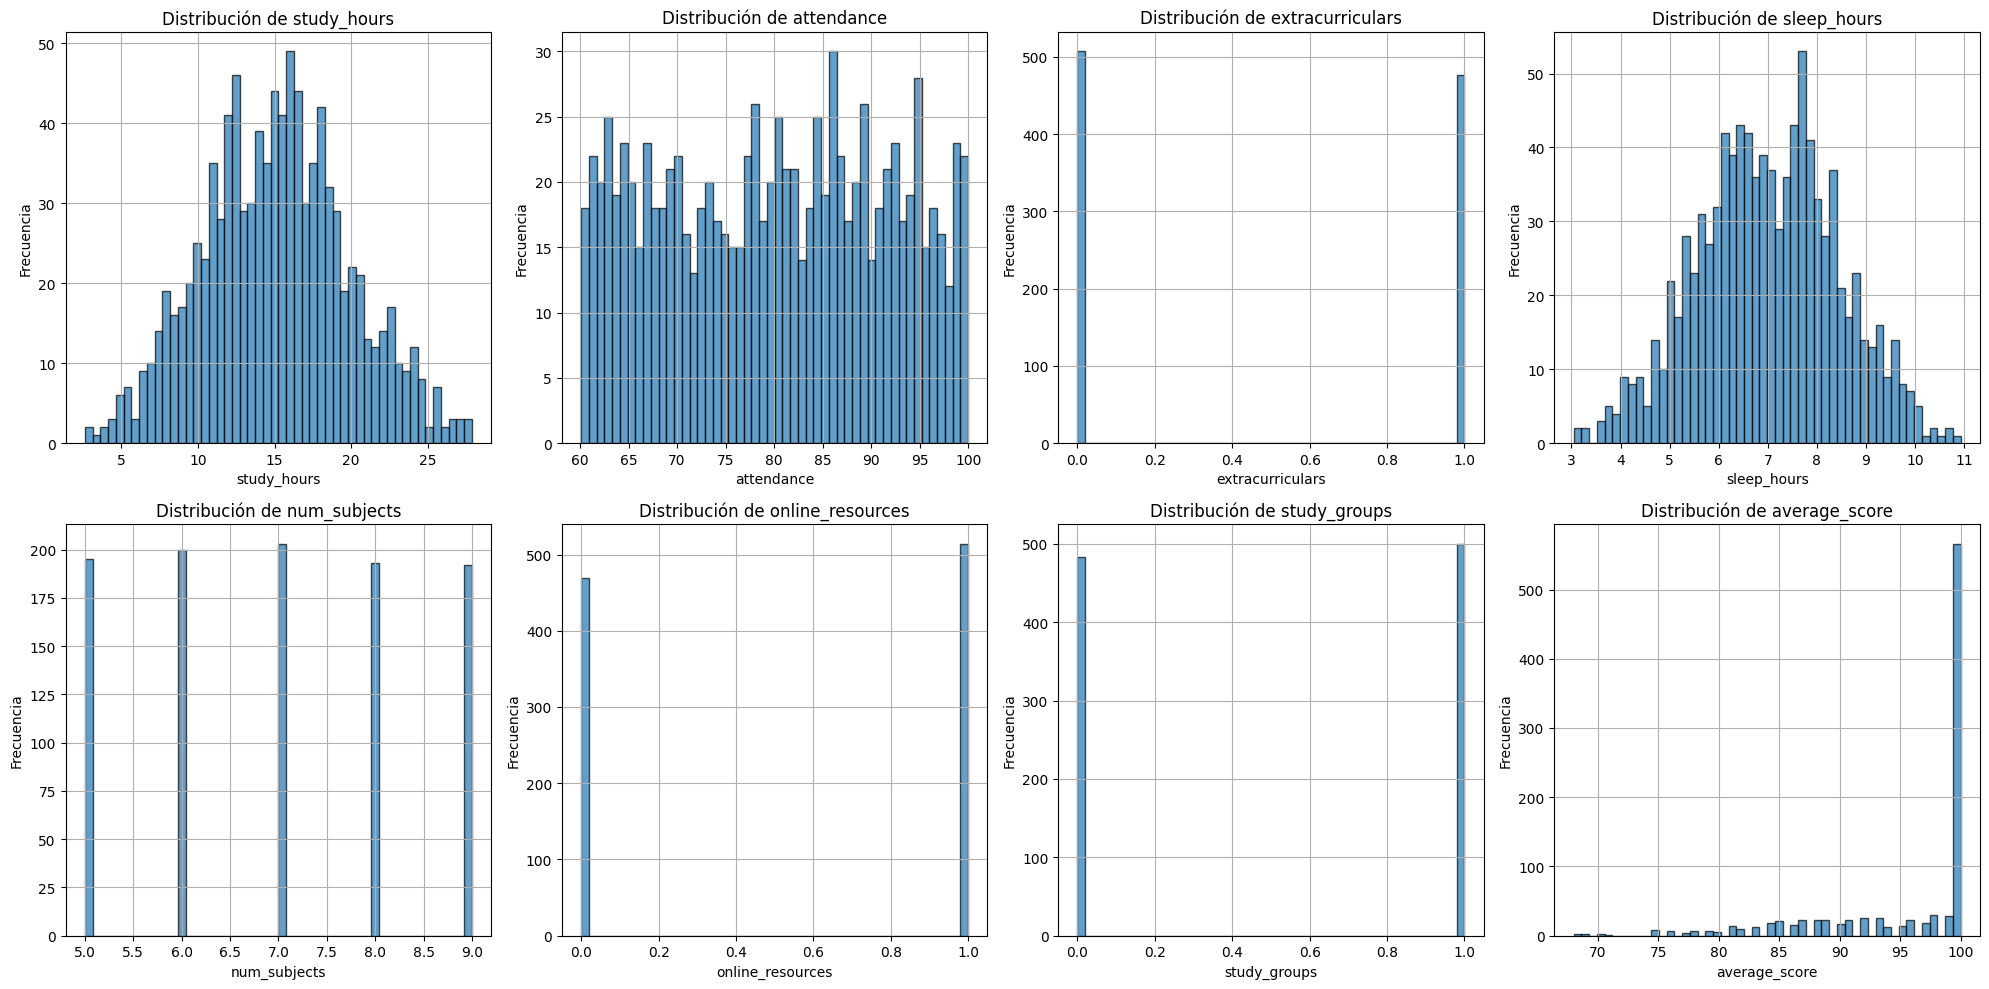

In [79]:
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = student.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(student[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [80]:
student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   study_hours       983 non-null    float64
 1   attendance        983 non-null    float64
 2   extracurriculars  983 non-null    int64  
 3   sleep_hours       983 non-null    float64
 4   num_subjects      983 non-null    int64  
 5   online_resources  983 non-null    int64  
 6   study_groups      983 non-null    int64  
 7   average_score     983 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 69.1 KB


In [82]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

lm = smf.ols(formula="average_score~study_hours+attendance+extracurriculars+sleep_hours+num_subjects+online_resources+study_groups+average_score", data = student).fit()

lm.params

Intercept          -4.165557e-13
study_hours        -2.796374e-15
attendance          6.084543e-16
extracurriculars   -2.395306e-14
sleep_hours        -2.775558e-15
num_subjects       -5.245804e-15
online_resources    1.570966e-14
study_groups        1.665335e-14
average_score       1.000000e+00
dtype: float64

In [83]:
lm.pvalues

Intercept           0.064108
study_hours         0.377295
attendance          0.747981
extracurriculars    0.371259
sleep_hours         0.757333
num_subjects        0.565115
online_resources    0.559945
study_groups        0.541776
average_score       0.000000
dtype: float64

In [89]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.642e+28
Date:                Sat, 17 Jan 2026   Prob (F-statistic):               0.00
Time:                        12:16:26   Log-Likelihood:                 26671.
No. Observations:                 983   AIC:                        -5.332e+04
Df Residuals:                     974   BIC:                        -5.328e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.166e-13   2.25e-13     -1.854      0.064   -8.58e-13    2.45e-14
study_hours      -2.796e-15   3.17e-15     -0.883      0.377   -9.01e-15    3.42e-15
attendance        6.085e-16   1.89e-15      0.321      0.748   -3.11e-15    4.32e-15
extracurriculars -2.395e-14   2.68e-14     -0.895      0.371   -7.65e-14    2.86e-14
sleep_hours      -2.776e-15   8.98e-15     -0.309      0.757   -2.04e-14    1.48e-14
num_subjects     -5.246e-15   9.12e-15     -0.575      0.565   -2.31e-14    1.26e-14
online_resources  1.571e-14   2.69e-14      0.583      0.560   -3.72e-14    6.86e-14
study_groups      1.665e-14   2.73e-14      0.610      0.542   -3.69e-14    7.02e-14
average_score        1.0000   3.55e-15   2.82e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        3.794   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.378
Skew:                           0.074   Prob(JB):                        0.185
Kurtosis:                       2.754   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Variable objetivo (y)
y = student['average_score']

# Variables predictoras (X)
X = student.drop(columns=['average_score'])


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 6.766497461928934
R²: 0.8700960968626299


In [90]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear modelo de Boosting
boosting_model = GradientBoostingRegressor(
    n_estimators=200,   # número de árboles
    learning_rate=0.1,  # tasa de aprendizaje
    max_depth=3,        # profundidad máxima de cada árbol
    random_state=42
)

# Entrenar
boosting_model.fit(X_train, y_train)

# Predecir
y_pred = boosting_model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 1.2143325661896187
R²: 0.9766871204870177


In [92]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modelos base
estimators = [
    ("rf", RandomForestRegressor(n_estimators=200, random_state=42)),
    ("gb", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)),
    ("knn", KNeighborsRegressor(n_neighbors=5))
]

# Meta-modelo
final_estimator = LinearRegression()

# Stacking
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Entrenamiento
stacking_model.fit(X_train, y_train)

# Predicciones
y_pred_stack = stacking_model.predict(X_test)

# Evaluación
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("MSE Stacking:", mse_stack)
print("R² Stacking:", r2_stack)


MSE Stacking: 1.1569856552940914
R² Stacking: 0.9777880722866916


# Reto semanal

Manos a la obra: aplica el método de _**bagging**_ y de _**boosting**_ al _dataframe_ que hemos generado e indica tus resultados.

Intenta con otra cantidad de elementos e indica el argumento `random_state` que gustes.